In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('data/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
age = df['Age']
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [29]:
age_is_nan= age[pd.isnull(age)]

In [31]:
len(age_is_nan)

177

In [27]:
age.mean()

29.69911764705882

In [39]:
df[df['Pclass']==1]['Fare'].mean()

84.1546875

In [40]:
df[df['Pclass']==2]['Fare'].mean()

20.662183152173913

In [41]:
df[df['Pclass']==3]['Fare'].mean()

13.675550101832993

In [44]:
mean_fare = df.pivot_table(index = 'Pclass',values='Fare',aggfunc='mean')#pivot_table可以直接统计
#Signature:df.pivot_table(
# values=None,
#     index=None,
#     columns=None,
#     aggfunc='mean',
#     fill_value=None,
#     margins=False,
#     dropna=True,
#     margins_name='All',
#     observed=False,
# ) -> 'DataFrame'

In [43]:
mean_fare

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [48]:
df.pivot_table(index = 'Pclass',values='Age')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [51]:
df.pivot_table(index = 'Embarked',values=['Fare','Survived'], aggfunc='sum',)

,Fare,Survived
Embarked,,
C,10072.2962,93
Q,1022.2543,30
S,17439.3988,217


In [67]:
new_df = df.dropna()
#Signature: df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [68]:
display(new_df.shape)
display(df.shape)

(183, 12)

(891, 12)

In [70]:
new_df2 = df.dropna(subset=['Age'])
display(new_df2.shape)

(714, 12)

In [76]:
new_df2.loc[600,'Age']

24.0

In [84]:
new_df2.sort_values('Age', ascending=False,ignore_index=True).head()
# Signature:
# new_df2.sort_values(
#     by,
#     axis=0,
#     ascending=True,
#     inplace=False,
#     kind='quicksort',
#     na_position='last',
#     ignore_index=False,
# )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
3,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [89]:
# df.apply(自定义函数名称)，可以运行自定义的函数
# Signature: df.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
def null_count(column):
    column_null = pd.isnull(column)
    null = column[column_null]
    return len(null)
df.apply(null_count)
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
fandango = pd.read_csv('data/fandango_score_comparison.csv')

In [93]:
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [96]:
film = fandango.iloc[50]
film

FILM                          Pitch Perfect 2 (2015)
RottenTomatoes                                    67
RottenTomatoes_User                               68
Metacritic                                        63
Metacritic_User                                  5.7
IMDB                                             6.7
Fandango_Stars                                   4.5
Fandango_Ratingvalue                             4.2
RT_norm                                         3.35
RT_user_norm                                     3.4
Metacritic_norm                                 3.15
Metacritic_user_nom                             2.85
IMDB_norm                                       3.35
RT_norm_round                                    3.5
RT_user_norm_round                               3.5
Metacritic_norm_round                              3
Metacritic_user_norm_round                         3
IMDB_norm_round                                  3.5
Metacritic_user_vote_count                    

In [112]:
film_score = film.values[1:]

In [116]:
film_score.min()

0.3

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df4 = pd.read_csv('data/UNRATE.csv')
df4['DATE'].head()

0    1948-01-01
1    1948-02-01
2    1948-03-01
3    1948-04-01
4    1948-05-01
Name: DATE, dtype: object

In [165]:
df4['DATE'] = pd.to_datetime(df4['DATE'])
df4['DATE'].tail()


819   2016-04-01
820   2016-05-01
821   2016-06-01
822   2016-07-01
823   2016-08-01
Name: DATE, dtype: datetime64[ns]

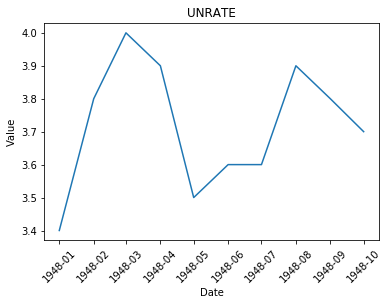

In [170]:
plt.plot(df4['DATE'][:10],df4['VALUE'][:10])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('UNRATE')
plt.xticks(rotation = 45)
plt.show()

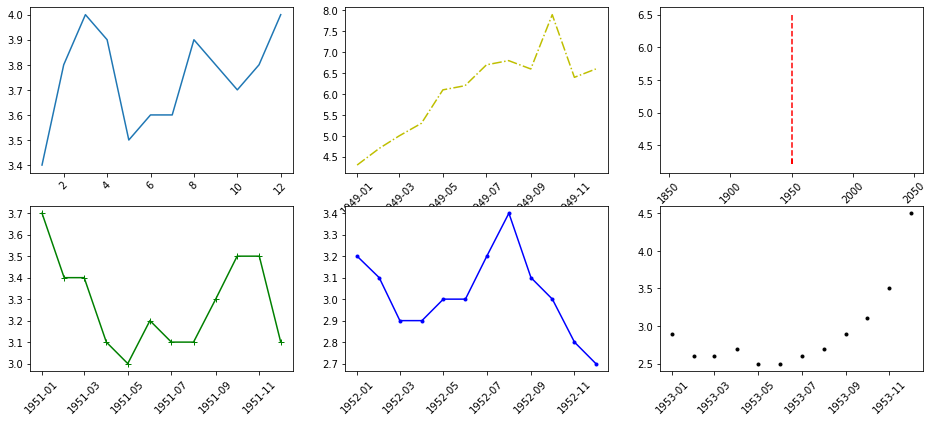

In [202]:
#分片
fig = plt.figure(figsize =[16,14])
fig.add_subplot(431)
plt.plot(df4['DATE'][:12].dt.month,df4['VALUE'][:12])
plt.xticks(rotation = 45)
fig.add_subplot(432)
plt.plot(df4['DATE'][12:24],df4['VALUE'][12:24],'y-.')
plt.xticks(rotation = 45)
fig.add_subplot(433)
plt.plot(df4['DATE'][24:36].dt.year,df4['VALUE'][24:36],'r--')
plt.xticks(rotation = 45)
fig.add_subplot(434)
plt.plot(df4['DATE'][36:48],df4['VALUE'][36:48],'g+-')
plt.xticks(rotation = 45)
fig.add_subplot(435)
plt.plot(df4['DATE'][48:60],df4['VALUE'][48:60],'b.-')
plt.xticks(rotation = 45)
fig.add_subplot(436)
plt.plot(df4['DATE'][60:72],df4['VALUE'][60:72],'k.')
plt.xticks(rotation = 45)
plt.show()